In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
len(df.columns)

21

In [7]:
len(df)

7043

In [8]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
df.TotalCharges.isna().value_counts()

TotalCharges
False    7032
True       11
Name: count, dtype: int64

In [11]:
df.TotalCharges = df.TotalCharges.fillna(0)
df.TotalCharges.isna().value_counts()

TotalCharges
False    7043
Name: count, dtype: int64

In [12]:
def make_data_uniform(df):
    
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    string_columns = list(df.dtypes[df.dtypes == 'object'].index)
    
    for col in string_columns:
        df[col] = df[col].str.lower().str.replace(' ', '_')


In [13]:
make_data_uniform(df)

In [14]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [15]:
# Convert target 'churn' from categorical to numeric
df.churn = (df.churn == 'yes').astype(int)
df.churn.mean()

0.2653698707936959

In [16]:
# Split into train, test, and val
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=1)

y_train = df_train.churn
y_val = df_val.churn

del df_train['churn']
del df_val['churn']

In [17]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [18]:
global_mean = df_train_full.churn.mean()

In [19]:
def separate_data(df):
    
    columns = list(df.columns)
    data_types = list(df.dtypes)
    n = len(df.columns)
    categorical = []
    numerical = []
    
    for i in range(n):
        
        if data_types[i] == 'object':
            categorical.append(columns[i])
        else:
            numerical.append(columns[i])
            
    return categorical, numerical

In [20]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [21]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [22]:
df_train_full[df_train_full.gender == 'male'].churn.mean()

0.2632135306553911

In [23]:
df_train_full[df_train_full.gender == 'female'].churn.mean()

0.27682403433476394

In [24]:
df_train_full[df_train_full.partner == 'yes'].churn.mean()

0.20503330866025166

In [25]:
df_train_full[df_train_full.partner == 'no'].churn.mean()

0.3298090040927694

In [26]:
# Checking risk ratio

df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean

df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [27]:
from IPython.display import display

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [28]:
# Correlation bw categorical variables

from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [29]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [30]:
# One-hot encoding the categorical variables

from sklearn.feature_extraction import DictVectorizer

train_dict = df_train[categorical+numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [31]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [32]:
# Trainning Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [33]:
def prepare_data(df):
    train_dict = df[categorical+numerical].to_dict(orient='records')
    X = dv.transform(train_dict)
    return X

In [34]:
X_val = prepare_data(df_val)

y_pred = model.predict_proba(X_val)
y_pred

array([[0.99142712, 0.00857288],
       [0.7902862 , 0.2097138 ],
       [0.78364348, 0.21635652],
       ...,
       [0.35664268, 0.64335732],
       [0.81055864, 0.18944136],
       [0.87261876, 0.12738124]])

In [35]:
y_pred = y_pred[:, 1]
churn = y_pred >= 0.5

In [36]:
(y_val == churn).mean()

0.8048387096774193

In [37]:
model.coef_.T

array([[ 5.84237812e-01],
       [-4.77724120e-02],
       [-6.44486170e-01],
       [-3.35527780e-02],
       [-7.44679914e-02],
       [ 4.98441875e-02],
       [-9.53374940e-02],
       [-6.25274628e-02],
       [-3.85713002e-02],
       [-6.94494692e-02],
       [-3.63238008e-01],
       [ 3.50554732e-01],
       [-9.53374940e-02],
       [ 2.85154212e-03],
       [-2.63728527e-01],
       [ 1.70176991e-01],
       [-1.44692332e-02],
       [ 5.98870936e-02],
       [-9.53374940e-02],
       [-7.25703689e-02],
       [ 2.21823163e-01],
       [-9.53374940e-02],
       [-2.34506439e-01],
       [-2.42300150e-01],
       [ 1.34279380e-01],
       [-1.34595056e-01],
       [ 2.65742871e-02],
       [-6.25979102e-02],
       [-1.42045883e-02],
       [ 4.11059194e-02],
       [-7.23241904e-02],
       [ 1.70176991e-01],
       [-2.78197760e-01],
       [ 1.99708769e-01],
       [-1.11942236e-01],
       [-9.53374940e-02],
       [ 9.92589605e-02],
       [-4.19318195e-02],
       [-9.5

In [38]:
weights = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

In [39]:
sample_customer = {
'gender': 'female',
'seniorcitizen': 1,
'partner': 'no',
'dependents': 'no',
'phoneservice': 'yes',
'multiplelines': 'yes',
'internetservice': 'fiber_optic',
'onlinesecurity': 'no',
'onlinebackup': 'no',
'deviceprotection': 'no',
'techsupport': 'no',
'streamingtv': 'yes',
'streamingmovies': 'no',
'contract': 'month-to-month',
'paperlessbilling': 'yes',
'paymentmethod': 'electronic_check',
'tenure': 1,
'monthlycharges': 85.7,
'totalcharges': 85.7
}

In [40]:
X_test = dv.transform([sample_customer])
y_test = model.predict_proba(X_test)[0, 1]
y_test

0.7930634378770952

In [41]:
# Calculate accuracy
y_pred = model.predict_proba(X_val)[:, 1]
churn = (y_pred >= 0.5)
(churn == y_val).mean()

0.8048387096774193

In [46]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 11)

for t in thresholds:
    y_pred = model.predict_proba(X_val)[:, 1]
    churn = (y_pred >= t)
    acc = accuracy_score(churn, y_val)
    print(f't:{round(t, 2)}, acc:{round(acc, 2)}')


t:0.0, acc:0.27
t:0.1, acc:0.59
t:0.2, acc:0.69
t:0.3, acc:0.75
t:0.4, acc:0.78
t:0.5, acc:0.8
t:0.6, acc:0.8
t:0.7, acc:0.77
t:0.8, acc:0.73
t:0.9, acc:0.73
t:1.0, acc:0.73


Text(0, 0.5, 'Accuracy')

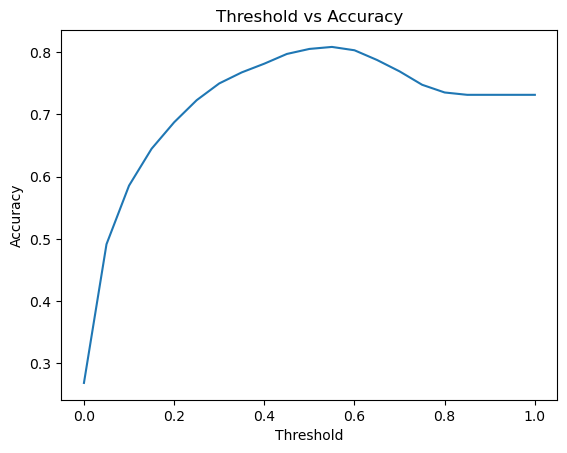

In [51]:
import matplotlib.pyplot as plt

thresholds = np.linspace(0, 1, 21)
accuracies = []

for t in thresholds:
    y_pred = model.predict_proba(X_val)[:, 1]
    churn = (y_pred >= t)
    acc = accuracy_score(churn, y_val)
    accuracies.append(acc)
    
plt.plot(thresholds, accuracies)
plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

In [53]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [54]:
from sklearn.metrics import roc_auc_score

y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858


In [55]:
import pickle

with open('churn-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)